<a href="https://colab.research.google.com/github/SIMA-SOIL/SIMA-SOIL/blob/main/How%20to%20draw%20a%20scater%20dense%20plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [212]:
import pandas as pd

# Load the data from the Excel file
data = pd.read_excel('Chart.xlsx')


# Display the first few rows of the dataset to understand its structure
data.head(), data.columns

(   Simulated SWC  Observed SWC
 0         0.4912      0.450813
 1         0.4709      0.444242
 2         0.4717      0.441093
 3         0.4643      0.441588
 4         0.4550      0.438442,
 Index(['Simulated SWC', 'Observed SWC'], dtype='object'))

In [102]:
!pip install mpl-scatter-density

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 655.5/655.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 8.1 MB/s eta 0:00:00


<ipython-input-213-04d777abccc6>:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


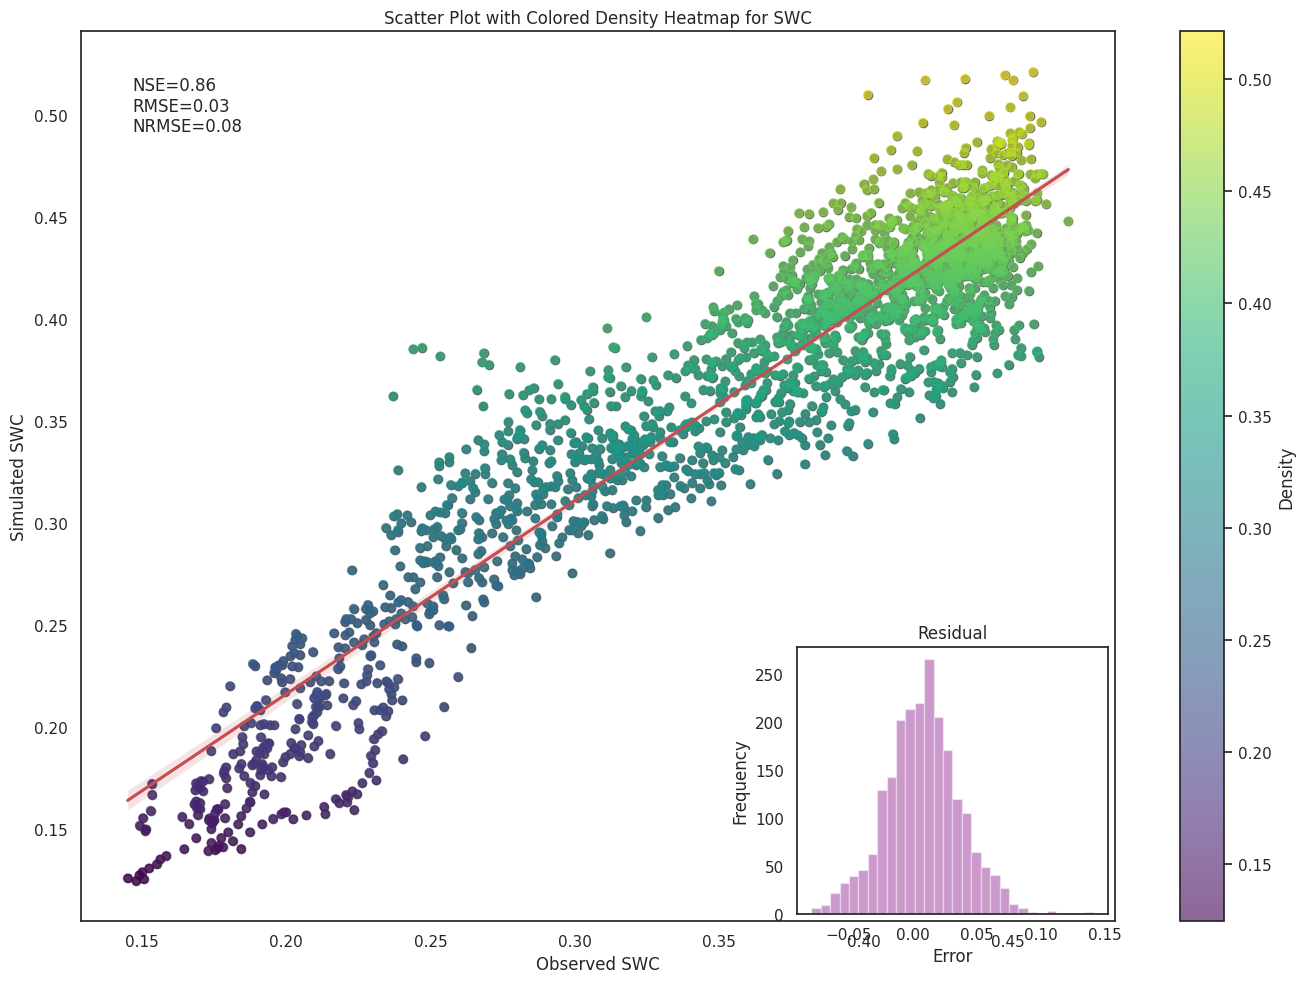

In [213]:
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from sklearn.metrics import mean_squared_error

# Assuming the functions nash_sutcliffe_efficiency and the dataframe 'data' are defined elsewhere

# Calculate residuals
data['Residuals'] = data['Simulated SWC'] - data['Observed SWC']

# Calculate metrics for the plots
rmse = np.sqrt(mean_squared_error(data['Observed SWC'], data['Simulated SWC']))
nse = nash_sutcliffe_efficiency(data['Observed SWC'], data['Simulated SWC'])
nrmse = rmse / np.mean(data['Observed SWC'])

# Set up the plot
fig, ax = plt.subplots(figsize=(14, 10))

# Scatter Plot with Density Heatmap
sns.regplot(x='Observed SWC', y='Simulated SWC', data=data, ax=ax, ci=99, color=".3", line_kws=dict(color="r"))
scatter_density = ax.scatter(data['Observed SWC'], data['Simulated SWC'], c=data['Simulated SWC'], cmap='viridis', alpha=0.6)
fig.colorbar(scatter_density, ax=ax, label='Density')
ax.set_title('Scatter Plot with Colored Density Heatmap for SWC')
ax.set_xlabel('Observed SWC')
ax.set_ylabel('Simulated SWC')

# Histogram of Residuals (inset plot)
inset_hist = inset_axes(ax, width="30%", height="30%", loc=4)
inset_hist.hist(data['Residuals'], bins=30, color='purple', alpha=0.4)
inset_hist.set_title('Residual')
inset_hist.set_xlabel('Error')
inset_hist.set_ylabel('Frequency')

# Annotations for NSE, RMSE, NRMSE
stats_text = f"NSE={nse:.2f}\nRMSE={rmse:.2f}\nNRMSE={nrmse:.2f}"
ax.annotate(stats_text, xy=(0.05, 0.95), xycoords='axes fraction', verticalalignment='top', bbox=dict(boxstyle="round", fc="white"))

plt.tight_layout()
plt.show()


<ipython-input-214-08770c11b2df>:23: UserWarning: You passed a edgecolor/edgecolors ('face') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter_density = ax.scatter(data['Observed SWC'], data['Simulated SWC'], c=data['Simulated SWC'], marker='x', cmap='viridis', alpha=0.7, s=20, edgecolor='face')
<ipython-input-214-08770c11b2df>:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


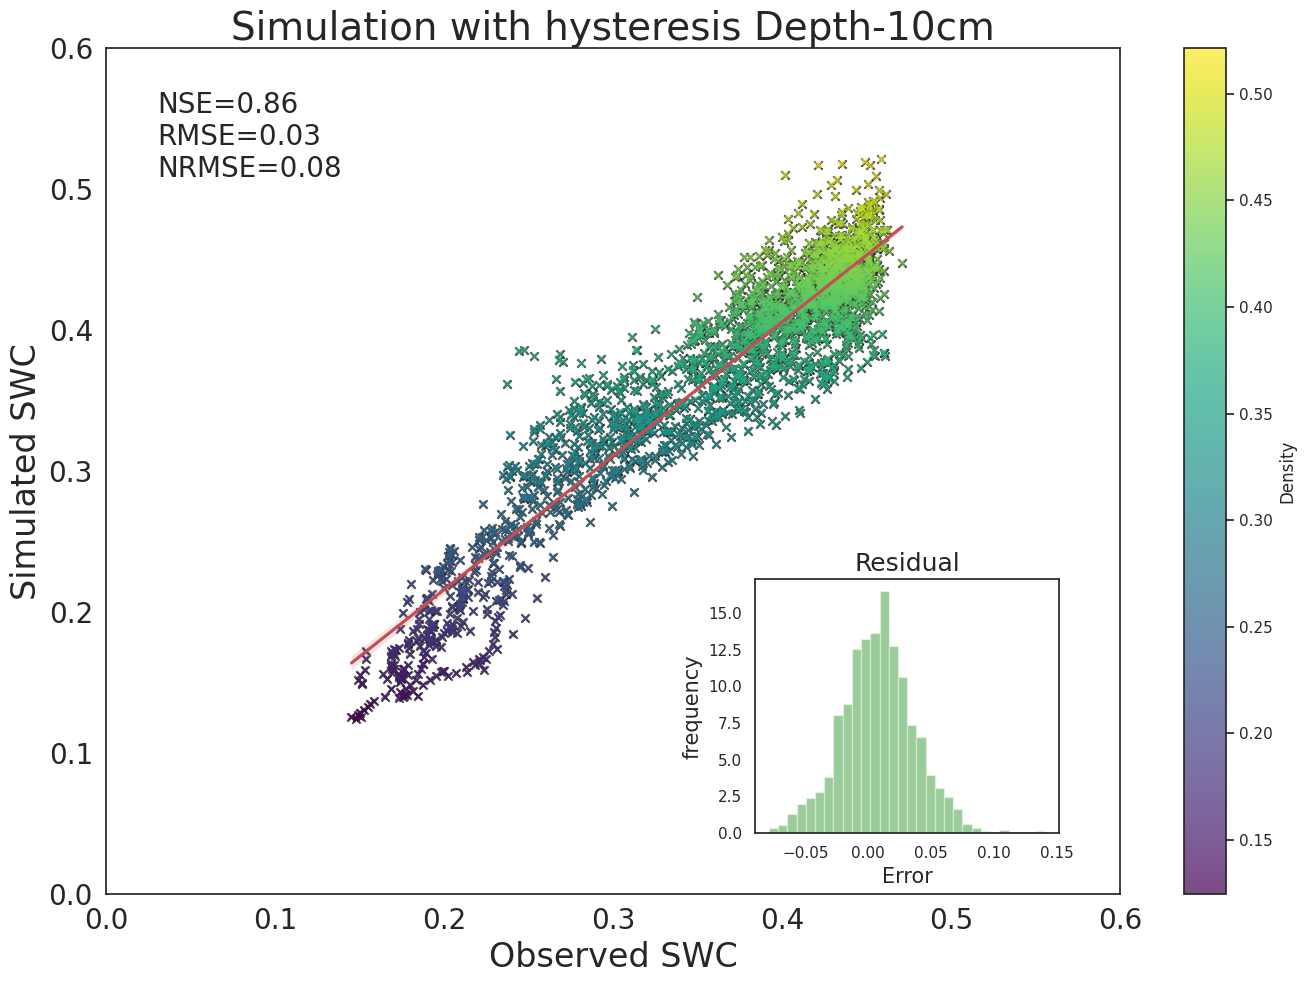

In [214]:
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from sklearn.metrics import mean_squared_error

# Assuming the functions nash_sutcliffe_efficiency and the dataframe 'data' are defined elsewhere

# Calculate residuals
data['Residuals'] = data['Simulated SWC'] - data['Observed SWC']

# Calculate metrics for the plots
rmse = np.sqrt(mean_squared_error(data['Observed SWC'], data['Simulated SWC']))
nse = nash_sutcliffe_efficiency(data['Observed SWC'], data['Simulated SWC'])
nrmse = rmse / np.mean(data['Observed SWC'])

# Set up the plot
fig, ax = plt.subplots(figsize=(14, 10))

# Scatter Plot with Density Heatmap
sns.regplot(x='Observed SWC', y='Simulated SWC', data=data, ax=ax, ci=99, marker="x", color=".1", line_kws=dict(color="r"))
scatter_density = ax.scatter(data['Observed SWC'], data['Simulated SWC'], c=data['Simulated SWC'], marker='x', cmap='viridis', alpha=0.7, s=20, edgecolor='face')
fig.colorbar(scatter_density, ax=ax, label='Density')
ax.set_title('Simulation with hysteresis Depth-10cm', fontsize=28)
ax.set_xlabel('Observed SWC', fontsize=24)
ax.set_ylabel('Simulated SWC', fontsize=24)
ax.set_xlim([0, 0.6])
ax.set_ylim([0, 0.6])
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)


# Histogram of Residuals (inset plot)
inset_hist = inset_axes(ax, width="30%", height="30%", loc='lower right', borderpad=4)
inset_hist.hist(data['Residuals'], bins=30, color='green', alpha=0.4, histtype='barstacked', density=True)
inset_hist.set_title('Residual', fontsize=18)
inset_hist.set_xlabel('Error', fontsize=15)
inset_hist.set_ylabel('frequency', fontsize=15)


# Annotations for NSE, RMSE, NRMSE
stats_text = f"NSE={nse:.2f}\nRMSE={rmse:.2f}\nNRMSE={nrmse:.2f}"
ax.annotate(stats_text, xy=(0.05, 0.95), xycoords='axes fraction', verticalalignment='top', bbox=dict(boxstyle="round", fc="white"), fontsize=20)

plt.tight_layout()
plt.show()
